# 1

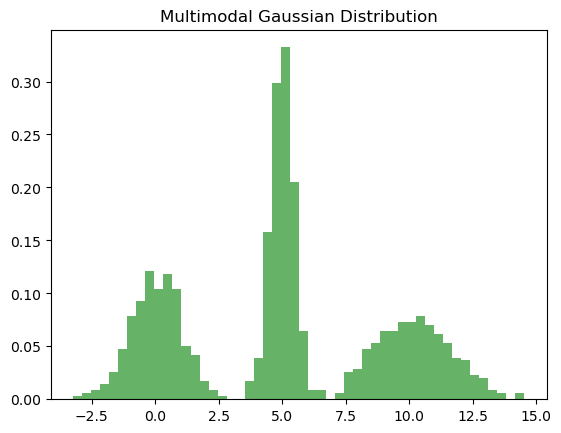

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for multimodal Gaussian distribution
means = [0, 5, 10]  # Means for each mode
stds = [1, 0.5, 1.5]  # Standard deviations for each mode
weights = [0.3, 0.4, 0.3]  # Weights for each mode

# Generate synthetic data
data = np.hstack([np.random.normal(loc=means[i], scale=stds[i], size=int(1000 * weights[i])) for i in range(3)])

# Plot the multimodal Gaussian distribution
plt.hist(data, bins=50, density=True, alpha=0.6, color='g')
plt.title("Multimodal Gaussian Distribution")
plt.savefig('q1.png', dpi=100) 
plt.show()

# 2

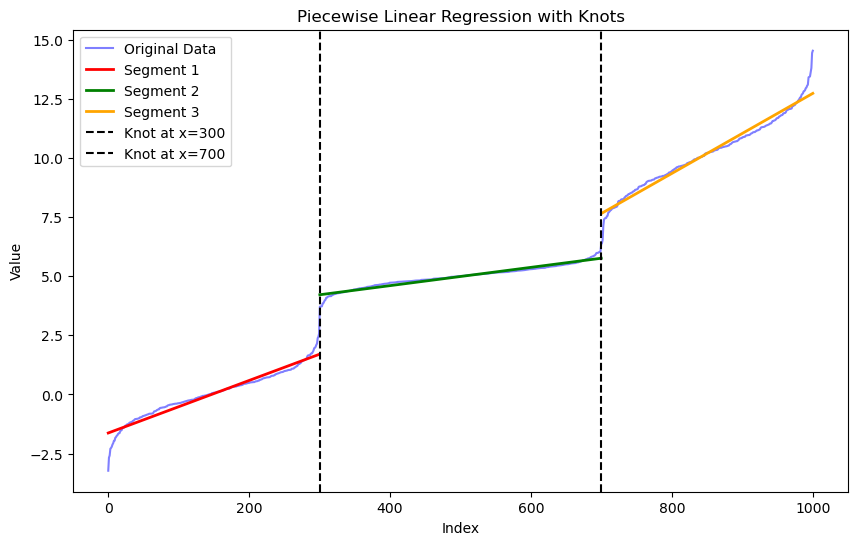

In [3]:
from sklearn.linear_model import LinearRegression

# Step 1: Sort the synthetic data generated from multimodal Gaussian
data = np.sort(data)

# Step 2: Create an independent variable 'x' (just an index array for our data)
x = np.linspace(0, len(data), len(data))

# Step 3: Define the knots (we'll choose 2 knots here as an example)
knots = [300, 700]  # These are indices, adjusting where we want the line segments to change

# Step 4: Split the data into segments based on the knots
x1, y1 = x[x < knots[0]], data[x < knots[0]]
x2, y2 = x[(x >= knots[0]) & (x < knots[1])], data[(x >= knots[0]) & (x < knots[1])]
x3, y3 = x[x >= knots[1]], data[x >= knots[1]]

# Step 5: Fit a linear regression model for each segment
model1 = LinearRegression().fit(x1.reshape(-1, 1), y1)
model2 = LinearRegression().fit(x2.reshape(-1, 1), y2)
model3 = LinearRegression().fit(x3.reshape(-1, 1), y3)

# Step 6: Get predictions for each segment
y1_pred = model1.predict(x1.reshape(-1, 1))
y2_pred = model2.predict(x2.reshape(-1, 1))
y3_pred = model3.predict(x3.reshape(-1, 1))

# Step 7: Plot the original data (multimodal Gaussian) and piecewise linear fit
plt.figure(figsize=(10,6))
plt.plot(x, data, label='Original Data', color='blue', alpha=0.5)

# Plot each segment
plt.plot(x1, y1_pred, label='Segment 1', color='red', linewidth=2)
plt.plot(x2, y2_pred, label='Segment 2', color='green', linewidth=2)
plt.plot(x3, y3_pred, label='Segment 3', color='orange', linewidth=2)

# Mark the knots on the plot
for knot in knots:
    plt.axvline(x=knot, linestyle='--', color='black', label=f'Knot at x={knot}')

plt.title('Piecewise Linear Regression with Knots')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.savefig('q2.png', dpi=100)
plt.show()


# 3

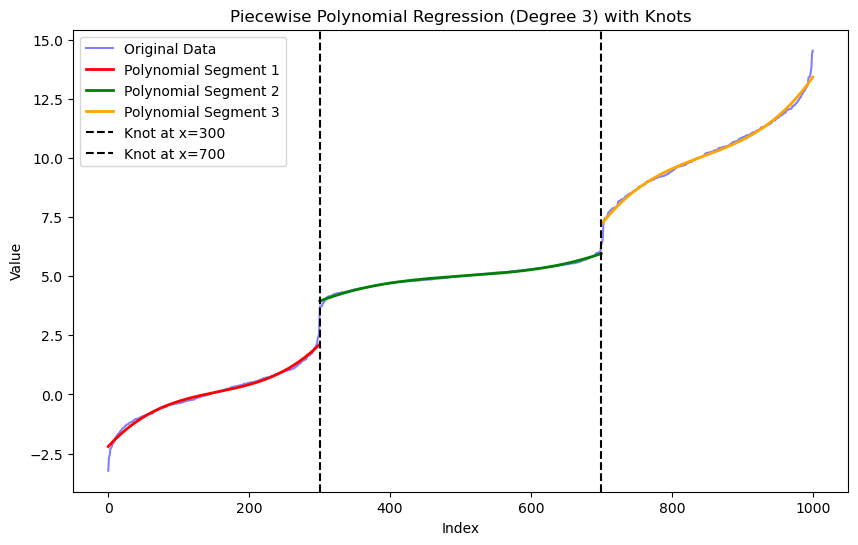

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Assuming we already have the data and knots from Question 1 and 2
# Data is the multimodal Gaussian data generated in Q1
data = np.sort(data)
x = np.linspace(0, len(data), len(data))

# Knots from question 2
knots = [300, 700]

# Polynomial degree
degree = 3  # You can change this to fit different degrees of polynomial

# Step 1: Split the data into segments based on the knots
x1, y1 = x[x < knots[0]], data[x < knots[0]]
x2, y2 = x[(x >= knots[0]) & (x < knots[1])], data[(x >= knots[0]) & (x < knots[1])]
x3, y3 = x[x >= knots[1]], data[x >= knots[1]]

# Step 2: Fit polynomial regression to each segment

# Polynomial Features for the first segment
poly1 = PolynomialFeatures(degree=degree)
x1_poly = poly1.fit_transform(x1.reshape(-1, 1))
model1 = LinearRegression().fit(x1_poly, y1)

# Polynomial Features for the second segment
poly2 = PolynomialFeatures(degree=degree)
x2_poly = poly2.fit_transform(x2.reshape(-1, 1))
model2 = LinearRegression().fit(x2_poly, y2)

# Polynomial Features for the third segment
poly3 = PolynomialFeatures(degree=degree)
x3_poly = poly3.fit_transform(x3.reshape(-1, 1))
model3 = LinearRegression().fit(x3_poly, y3)

# Step 3: Make predictions for each segment
y1_pred = model1.predict(x1_poly)
y2_pred = model2.predict(x2_poly)
y3_pred = model3.predict(x3_poly)

# Step 4: Plot the original data and piecewise polynomial regression fit
plt.figure(figsize=(10, 6))

# Plot the original data
plt.plot(x, data, label='Original Data', color='blue', alpha=0.5)

# Plot the polynomial regression for each segment
plt.plot(x1, y1_pred, label='Polynomial Segment 1', color='red', linewidth=2)
plt.plot(x2, y2_pred, label='Polynomial Segment 2', color='green', linewidth=2)
plt.plot(x3, y3_pred, label='Polynomial Segment 3', color='orange', linewidth=2)

# Step 5: Mark knots on the plot
for knot in knots:
    plt.axvline(x=knot, linestyle='--', color='black', label=f'Knot at x={knot}')

# Adding labels and title
plt.title(f'Piecewise Polynomial Regression (Degree {degree}) with Knots')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.savefig('q3.png', dpi=100)
# Show the plot
plt.show()


# 4

In [7]:
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.linear_model import LinearRegression


# Polynomial regression results
rmse1 = root_mean_squared_error(y1, y1_pred)  # RMSE for segment 1 (polynomial)
rmse2 = root_mean_squared_error(y2, y2_pred)  # RMSE for segment 2 (polynomial)
rmse3 = root_mean_squared_error(y3, y3_pred)  # RMSE for segment 3 (polynomial)

r2_1 = r2_score(y1, y1_pred)  # R² for segment 1 (polynomial)
r2_2 = r2_score(y2, y2_pred)  # R² for segment 2 (polynomial)
r2_3 = r2_score(y3, y3_pred)  # R² for segment 3 (polynomial)

print(f"Piecewise Polynomial Regression - Segment 1: RMSE = {rmse1:.4f}, R² = {r2_1:.4f}")
print(f"Piecewise Polynomial Regression - Segment 2: RMSE = {rmse2:.4f}, R² = {r2_2:.4f}")
print(f"Piecewise Polynomial Regression - Segment 3: RMSE = {rmse3:.4f}, R² = {r2_3:.4f}")

# Now handle the piecewise linear regression:
# Fitting the linear regression models for each segment (from question 2)
model1_linear = LinearRegression().fit(x1.reshape(-1, 1), y1)
model2_linear = LinearRegression().fit(x2.reshape(-1, 1), y2)
model3_linear = LinearRegression().fit(x3.reshape(-1, 1), y3)

# Making predictions for each segment (linear regression)
y1_pred_linear = model1_linear.predict(x1.reshape(-1, 1))
y2_pred_linear = model2_linear.predict(x2.reshape(-1, 1))
y3_pred_linear = model3_linear.predict(x3.reshape(-1, 1))

# Calculate RMSE for linear regression models
rmse1_linear = root_mean_squared_error(y1, y1_pred_linear)
rmse2_linear = root_mean_squared_error(y2, y2_pred_linear)
rmse3_linear = root_mean_squared_error(y3, y3_pred_linear)

# Calculate R² for linear regression models
r2_1_linear = r2_score(y1, y1_pred_linear)
r2_2_linear = r2_score(y2, y2_pred_linear)
r2_3_linear = r2_score(y3, y3_pred_linear)

# Print results for piecewise linear regression
print(f"Piecewise Linear Regression - Segment 1: RMSE = {rmse1_linear:.4f}, R² = {r2_1_linear:.4f}")
print(f"Piecewise Linear Regression - Segment 2: RMSE = {rmse2_linear:.4f}, R² = {r2_2_linear:.4f}")
print(f"Piecewise Linear Regression - Segment 3: RMSE = {rmse3_linear:.4f}, R² = {r2_3_linear:.4f}")


Piecewise Polynomial Regression - Segment 1: RMSE = 0.1119, R² = 0.9872
Piecewise Polynomial Regression - Segment 2: RMSE = 0.0470, R² = 0.9895
Piecewise Polynomial Regression - Segment 3: RMSE = 0.1435, R² = 0.9907
Piecewise Linear Regression - Segment 1: RMSE = 0.2216, R² = 0.9496
Piecewise Linear Regression - Segment 2: RMSE = 0.1020, R² = 0.9505
Piecewise Linear Regression - Segment 3: RMSE = 0.2668, R² = 0.9679


# 5

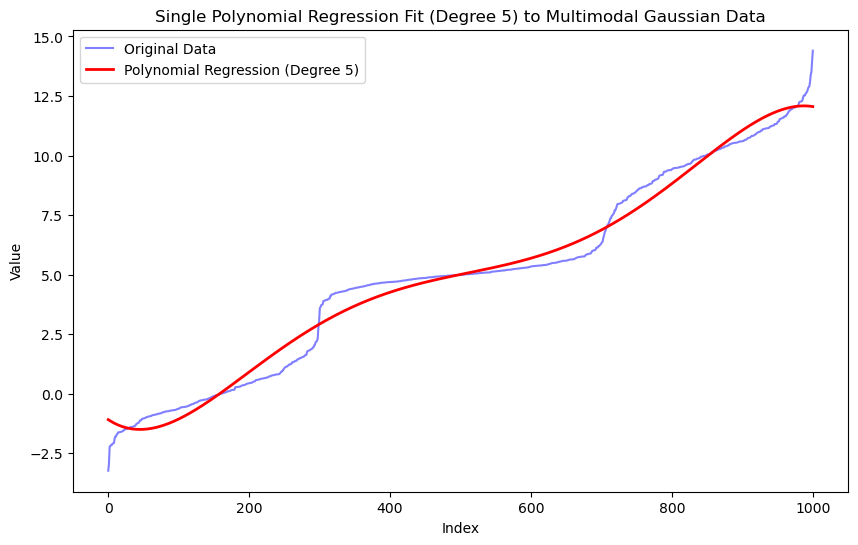

Single Polynomial Regression (Degree 5): RMSE = 0.5334, R² = 0.9825


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming the 'data' variable holds the multimodal Gaussian distribution from Question 1
# Sorting the data for visualization purposes
data = np.sort(data)

# Create the independent variable 'x' for modeling
x = np.linspace(0, len(data), len(data))

# Step 1: Define the polynomial degree (single polynomial regression)
degree = 5  # You can experiment with different degrees

# Step 2: Transform the input data to include polynomial terms
poly = PolynomialFeatures(degree=degree)
x_poly = poly.fit_transform(x.reshape(-1, 1))

# Step 3: Fit a linear regression model on the transformed polynomial features
model = LinearRegression()
model.fit(x_poly, data)

# Step 4: Make predictions using the fitted polynomial regression model
y_pred = model.predict(x_poly)

# Step 5: Plot the original data and the polynomial regression fit
plt.figure(figsize=(10, 6))
plt.plot(x, data, label='Original Data', color='blue', alpha=0.5)
plt.plot(x, y_pred, label=f'Polynomial Regression (Degree {degree})', color='red', linewidth=2)
plt.title(f'Single Polynomial Regression Fit (Degree {degree}) to Multimodal Gaussian Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.savefig('q5.png', dpi=100)
plt.show()

# Step 6: Evaluate the model performance
rmse = np.sqrt(mean_squared_error(data, y_pred))
r2 = r2_score(data, y_pred)

print(f"Single Polynomial Regression (Degree {degree}): RMSE = {rmse:.4f}, R² = {r2:.4f}")


# 6

In [9]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Task 2: Piecewise Linear Regression (assuming the data and knots are already defined)
start_task_2 = time.time()

# Code for Piecewise Linear Regression (task 2)
# Assuming 'x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'model1', 'model2', 'model3' from previous steps
model1_linear = LinearRegression().fit(x1.reshape(-1, 1), y1)
model2_linear = LinearRegression().fit(x2.reshape(-1, 1), y2)
model3_linear = LinearRegression().fit(x3.reshape(-1, 1), y3)

end_task_2 = time.time()
execution_time_task_2 = end_task_2 - start_task_2

# Task 3: Piecewise Polynomial Regression
start_task_3 = time.time()

# Code for Piecewise Polynomial Regression (task 3)
degree = 3
poly1 = PolynomialFeatures(degree=degree)
x1_poly = poly1.fit_transform(x1.reshape(-1, 1))
model1_poly = LinearRegression().fit(x1_poly, y1)

poly2 = PolynomialFeatures(degree=degree)
x2_poly = poly2.fit_transform(x2.reshape(-1, 1))
model2_poly = LinearRegression().fit(x2_poly, y2)

poly3 = PolynomialFeatures(degree=degree)
x3_poly = poly3.fit_transform(x3.reshape(-1, 1))
model3_poly = LinearRegression().fit(x3_poly, y3)

end_task_3 = time.time()
execution_time_task_3 = end_task_3 - start_task_3

# Task 5: Single Polynomial Regression
start_task_5 = time.time()

# Code for Single Polynomial Regression (task 5)
degree = 5
x = np.linspace(0, len(data), len(data))
poly = PolynomialFeatures(degree=degree)
x_poly = poly.fit_transform(x.reshape(-1, 1))
model_single_poly = LinearRegression().fit(x_poly, data)

end_task_5 = time.time()
execution_time_task_5 = end_task_5 - start_task_5

# Print the execution times
print(f"Execution time for Task 2 (Piecewise Linear Regression): {execution_time_task_2:.4f} seconds")
print(f"Execution time for Task 3 (Piecewise Polynomial Regression): {execution_time_task_3:.4f} seconds")
print(f"Execution time for Task 5 (Single Polynomial Regression): {execution_time_task_5:.4f} seconds")

# Calculate the differences in execution times
diff_task_2_task_3 = abs(execution_time_task_2 - execution_time_task_3)
diff_task_3_task_5 = abs(execution_time_task_3 - execution_time_task_5)
diff_task_2_task_5 = abs(execution_time_task_2 - execution_time_task_5)

print(f"Difference between Task 2 and Task 3: {diff_task_2_task_3:.4f} seconds")
print(f"Difference between Task 3 and Task 5: {diff_task_3_task_5:.4f} seconds")
print(f"Difference between Task 2 and Task 5: {diff_task_2_task_5:.4f} seconds")


Execution time for Task 2 (Piecewise Linear Regression): 0.0050 seconds
Execution time for Task 3 (Piecewise Polynomial Regression): 0.0175 seconds
Execution time for Task 5 (Single Polynomial Regression): 0.0082 seconds
Difference between Task 2 and Task 3: 0.0125 seconds
Difference between Task 3 and Task 5: 0.0093 seconds
Difference between Task 2 and Task 5: 0.0032 seconds


# 7

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Assuming the data from Task 5
degree = 5  # Same degree as the polynomial regression model
x = np.linspace(0, len(data), len(data)).reshape(-1, 1)  # Reshape x for regression models

# Generate polynomial features
poly = PolynomialFeatures(degree=degree)
x_poly = poly.fit_transform(x)

# Standardize the polynomial features
scaler = StandardScaler()
x_poly_scaled = scaler.fit_transform(x_poly)

# Polynomial Regression
poly_model = LinearRegression()
poly_model.fit(x_poly, data)
y_pred_poly = poly_model.predict(x_poly)

# Ridge Regression (increase alpha for stronger regularization)
ridge_model = Ridge(alpha=10.0)  # Stronger regularization
ridge_model.fit(x_poly_scaled, data)
y_pred_ridge = ridge_model.predict(x_poly_scaled)

# LASSO Regression (increase alpha and max_iter for convergence)
lasso_model = Lasso(alpha=0.1, max_iter=5000)
lasso_model.fit(x_poly_scaled, data)
y_pred_lasso = lasso_model.predict(x_poly_scaled)

# Evaluate all models with RMSE and R²
rmse_poly = np.sqrt(mean_squared_error(data, y_pred_poly))
r2_poly = r2_score(data, y_pred_poly)

rmse_ridge = np.sqrt(mean_squared_error(data, y_pred_ridge))
r2_ridge = r2_score(data, y_pred_ridge)

rmse_lasso = np.sqrt(mean_squared_error(data, y_pred_lasso))
r2_lasso = r2_score(data, y_pred_lasso)

# Print results
print(f"Polynomial Regression: RMSE = {rmse_poly:.4f}, R² = {r2_poly:.4f}")
print(f"Ridge Regression: RMSE = {rmse_ridge:.4f}, R² = {r2_ridge:.4f}")
print(f"LASSO Regression: RMSE = {rmse_lasso:.4f}, R² = {r2_lasso:.4f}")

# Compare coefficients
print("\nPolynomial Regression Coefficients:", poly_model.coef_)
print("Ridge Regression Coefficients:", ridge_model.coef_)
print("LASSO Regression Coefficients:", lasso_model.coef_)




Polynomial Regression: RMSE = 0.5909, R² = 0.9789
Ridge Regression: RMSE = 0.7414, R² = 0.9668
LASSO Regression: RMSE = 0.7546, R² = 0.9656

Polynomial Regression Coefficients: [ 0.00000000e+00 -1.71107422e-02  2.42218639e-04 -6.71944846e-07
  7.54695629e-10 -2.94439918e-13]
Ridge Regression Coefficients: [ 0.          3.52893874  0.13273298 -0.43037451  0.07588019  0.7586004 ]
LASSO Regression Coefficients: [0.         3.50491268 0.         0.         0.         0.46483249]
